<a href="https://colab.research.google.com/github/andresreinosoq/ModeloRandomForestRegressor/blob/main/Implementacion_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.tree import export_graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib
import sys


In [ ]:
!pip install mlxtend



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**ALGORITMO CON RANDOM FOREST METODO  GET DUMMIES POSTERIOR A LA SELECCION DE DATOS CON MAYOR CORRELACION. **


In [30]:
xls=pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/ValidacionAlgoritmosArticulo/datosCorrelacionados.xlsx")
df = pd.read_excel(xls)
# Datos con mayor correlación

In [ ]:
#Calcular algunas estadísticas del df
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5615.0,3248.036866,1844.823871,0.000000,1671.000000,3248.000000,4835.500000,6481.000000
Begin_YR,5615.0,2017.614960,2.321257,2000.000000,2016.000000,2018.000000,2020.000000,2020.000000
AgeWhenStarting,5615.0,19.975290,2.099784,16.673973,18.728767,19.361644,20.489041,40.534247
CredRef,5615.0,3002.898308,3686.863302,30.000000,157.000000,248.000000,8000.000000,8200.000000
PorcenAcum,5615.0,42.150041,37.826864,0.000000,0.500000,34.070000,80.045000,100.000000
NroMiem,5615.0,4.028495,1.414934,1.000000,3.000000,4.000000,5.000000,17.000000
IngresoPadre,5615.0,535.508709,685.351552,0.000000,0.000000,400.000000,700.000000,7743.570000
IngresoMadre,5615.0,301.566130,453.183581,0.000000,0.000000,0.000000,404.940000,4374.880000
Ipf,5615.0,139.219918,256.354860,0.000000,0.000000,49.480000,170.975000,3896.850000
Calif,5615.0,25.225271,5.129284,0.000000,23.617157,25.159794,28.466667,37.600000


In [ ]:
df= df.drop(columns=['Unnamed: 0'], axis=1)

'\nInterpretación del coeficiente:\n1: mientras la una variable crece, la otra también\n0: no hay relación\n-1: mientras la una aumenta, la otra disminuye\n'

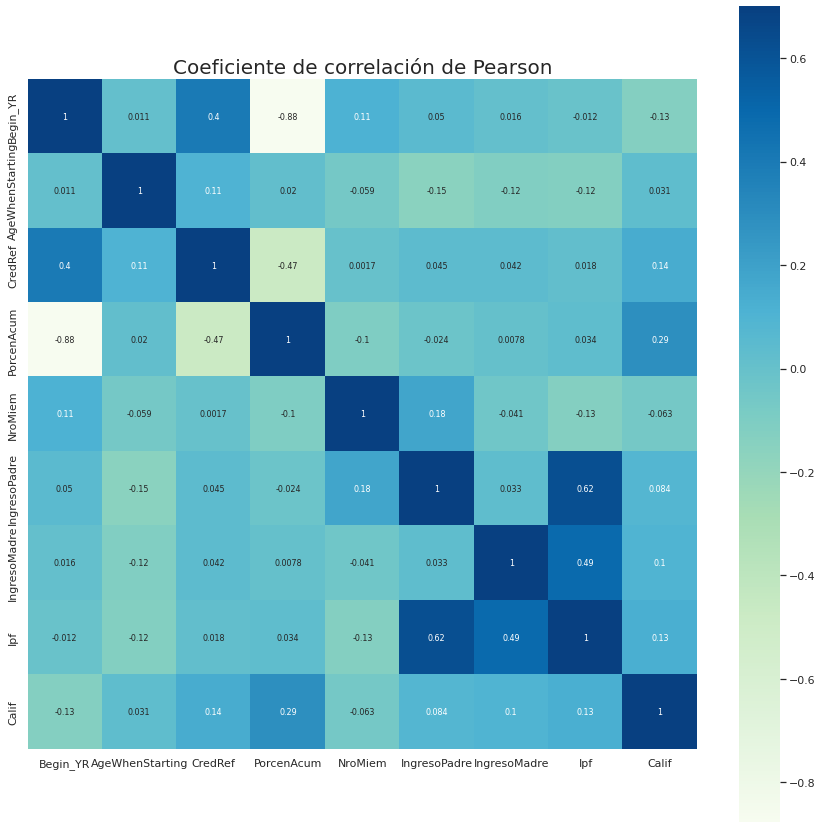

In [ ]:
#Coeficiente de Correlación de Pearson
#Escalar los datos para graficar
sns.set(style="whitegrid", font_scale=1)

#Configurar la gráfica
plt.figure(figsize=(15,15))
plt.title('Coeficiente de correlación de Pearson', fontsize=20)

#.corr: calcula el coef; annot: para que se vea los valores dentro de los cuadrados, annot_kws: tamaño de las etiquetas de los cuadrados
sns.heatmap(df.corr(), vmax=0.7, square=True, cmap="GnBu", linecolor='b', annot=True, annot_kws={'size':8})

"""
Interpretación del coeficiente:
1: mientras la una variable crece, la otra también
0: no hay relación
-1: mientras la una aumenta, la otra disminuye
"""

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PeriodoInicioCarr     5615 non-null   object 
 1   Begin_YR              5615 non-null   float64
 2   AgeWhenStarting       5615 non-null   float64
 3   Carrera               5615 non-null   object 
 4   Facultad              5615 non-null   object 
 5   CredRef               5615 non-null   float64
 6   PorcenAcum            5615 non-null   float64
 7   NroMiem               5615 non-null   float64
 8   IngresoPadre          5615 non-null   float64
 9   IngresoMadre          5615 non-null   float64
 10  AfiliadoPadre         5615 non-null   object 
 11  AfiliadoMadre         5615 non-null   object 
 12  Propiedad             5615 non-null   object 
 13  Vehiculo              5615 non-null   object 
 14  Ipf                   5615 non-null   float64
 15  ComputadorEsPersonal 

In [31]:
df.head(10)

Unnamed: 0 PeriodoInicioCarr  Begin_YR  ...     Ipf ComputadorEsPersonal  \
0         0.0            2019-B    2019.0  ...    0.00                   No   
1         1.0            2019-B    2019.0  ...    0.00                   Si   
2         2.0            2019-B    2019.0  ...    0.00                   Si   
3         3.0            2019-A    2019.0  ...    0.00                   No   
4         4.0            2020-A    2020.0  ...    0.00                   No   
5         5.0            2016-B    2016.0  ...    0.00                   Si   
6         6.0            2019-A    2019.0  ...  207.43                   No   
7         7.0            2019-B    2019.0  ...  171.21                   No   
8         8.0            2019-B    2019.0  ...  158.06                   Si   
9         9.0            2020-A    2020.0  ...    0.00                   No   

    Calif  
0  26.792  
1  11.300  
2  20.460  
3  26.757  
4  31.413  
5  21.362  
6   2.320  
7  13.740  
8  19.180  
9  24.993  

[10 rows x 18 columns]

In [ ]:
#  One-hot enconding usando  pandas get_dummies
df = pd.get_dummies(df,drop_first = True)

In [ ]:
# mostrando las primeras 5 filas de las 95 columnas 

df.iloc[:,5:].head(5)

,IngresoPadre,IngresoMadre,Ipf,Calif,PeriodoInicioCarr_2005-1,PeriodoInicioCarr_2005-2,PeriodoInicioCarr_2006-1,PeriodoInicioCarr_2006-2,PeriodoInicioCarr_2007-1,PeriodoInicioCarr_2007-2,...,Facultad_INGENIERIA MECANICA,Facultad_INGENIERIA QUIMICA Y AGROINDUSTRIA,Facultad_NIVELACION,Facultad_TECNOLOGICA,AfiliadoPadre_SI,AfiliadoMadre_SI,Propiedad_SI,Vehiculo_SI,ComputadorEsPersonal_No tiene computador,ComputadorEsPersonal_Si
0,0.0,250.0,0.0,26.792308,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,300.0,0.0,0.0,11.300000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,500.0,0.0,0.0,20.460000,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0.0,0.0,0.0,26.757143,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,0.0,31.413333,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.info()

In [ ]:
df.to_excel("datosGetDummies.xlsx") 

In [ ]:
x = df.drop('Calif', axis=1)
y = df['Calif']
# Saving feature names for later use
feature_list = list(df.columns)

In [ ]:
#Constuir X (todas las columnas menos la variable objetivo) e Y (la variable objetivo)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
# Verificando la candidad de datos de los atributos de entrenamiento y pruebas, deben tener la misma forma

print('Training X Shape:', x_train.shape)
print('Training Y Shape:', y_train.shape)
print('Testing X Shape:', x_test.shape)
print('Testing Y Shape:', y_test.shape)

Training X Shape: (4211, 99)
Training Y Shape: (4211,)
Testing X Shape: (1404, 99)
Testing Y Shape: (1404,)


In [ ]:
# Instanciando el modelo con 1000 arboles de decision 
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenando el modelo con data de entrenamiento
rfr.fit(x_train, y_train);

In [ ]:
# Se aplica el metodo de prediccion random forest en los datos de prueba 
y_pred = rfr.predict(x_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print(' Error Absoluto Medio:', round(np.mean(errors), 2), 'Puntos.')
#Error RMSE 

 Error Absoluto Medio: 1.44 Puntos.


In [ ]:
#Evaluando el argoritmo
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4397633595972985
Mean Squared Error: 4.5062068738803
Root Mean Squared Error: 2.1227828136388096


In [ ]:
rfr.score(x_train, y_train)
#score(X, y[, sample_weight]) Return the coefficient of determination of the prediction.

0.9772104395544395

In [ ]:
y_pred = rfr.predict(x_test)

In [ ]:
rfr.score(x_test, y_test)
print(f"la precision del modelo RANDOM FOREST REGRESION es {round(rfr.score(x_test, y_test),3)*100} %")
print(f"la precision del modelo RANDOM FOREST REGRESION es {round(rfr.score(x_test, y_test),3)} valor máximo 1 ")

la precision del modelo RANDOM FOREST REGRESION es 83.6 %
la precision del modelo RANDOM FOREST REGRESION es 0.836 valor máximo 1 


GENERANDO EL ARCHIVO PARA IMPLEMENTACION

In [ ]:
joblib.dump(rfr,'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [6]:
#Cargando modelo entrenado
imp = joblib.load('/content/drive/MyDrive/Colab Notebooks/ValidacionAlgoritmosArticulo/modelo_entrenado.pkl')

In [ ]:
imp.score(x_test, y_test)

0.8359812606202768

EJEMPLO DEL MODELO CON DATOS

In [7]:
xls=pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/ValidacionAlgoritmosArticulo/datosParaValidacion.xlsx")
dfVal = pd.read_excel(xls)
# Set de datos de prueba

In [ ]:
df.info()

In [9]:
df= df.drop(columns=['Unnamed: 0'], axis=1)

NameError: ignored

In [10]:
x_val = dfVal.drop('Calif', axis=1)


In [11]:
y_val = dfVal['Calif']

In [12]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 99 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Begin_YR                                                           19 non-null     int64  
 1   AgeWhenStarting                                                    19 non-null     float64
 2   CredRef                                                            19 non-null     int64  
 3   PorcenAcum                                                         19 non-null     float64
 4   NroMiem                                                            19 non-null     int64  
 5   IngresoPadre                                                       19 non-null     int64  
 6   IngresoMadre                                                       19 non-null     int64  
 7   Ipf                         

In [ ]:
x_val.head()

,PeriodoInicioCarr,Begin_YR,AgeWhenStarting,Carrera,Facultad,CredRef,PorcenAcum,NroMiem,IngresoPadre,IngresoMadre,AfiliadoPadre,AfiliadoMadre,Propiedad,Vehiculo,Ipf,ComputadorEsPersonal
0,2019-B,2019.0,18.813699,(RRA) PETROLEOS,GEOLOGIA Y PETROLEOS,8000.0,9.50,5.0,0.0,250.0,NO,NO,NO,NO,0.0,No
1,2019-B,2019.0,17.912329,"INGENIERIA, CIENCIAS Y CIENCIAS ADMINISTRATIVAS",NIVELACION,32.0,12.50,1.0,300.0,0.0,NO,NO,NO,NO,0.0,Si
2,2019-B,2019.0,17.942466,"INGENIERIA, CIENCIAS Y CIENCIAS ADMINISTRATIVAS",NIVELACION,32.0,56.25,5.0,500.0,0.0,SI,NO,NO,NO,0.0,Si
3,2019-A,2019.0,18.663014,(RRA) INGENIERIA CIVIL,INGENIERIA CIVIL,8000.0,11.00,2.0,0.0,0.0,NO,NO,SI,NO,0.0,No
4,2020-A,2020.0,21.038356,(RRA) INGENIERIA QUIMICA,INGENIERIA QUIMICA Y AGROINDUSTRIA,8040.0,16.42,2.0,0.0,0.0,NO,NO,NO,SI,0.0,No


In [13]:
y_predVal = imp.predict(x_val)

In [ ]:
imp.score(x_val, y_predVal)

1.0

In [ ]:
from IPython.display import display_html 

In [ ]:
print(y_predVal)

[33.92773315 31.13337805 32.12072706 28.74783476 23.98186579 29.4060403
 30.07535526 31.81805424 24.99347738 28.44770169 26.54744762 29.36149424
 28.15515507 31.07840384 24.99347738 27.06144187 20.58508667 31.9686684
 26.24944891]


In [15]:
# converting the NumPy array 
# to a Pandas series
y_predVal = pd.Series(y_predVal) 

In [40]:
print(y_val)

0     34.191
1     29.821
2     32.765
3     30.071
4     28.880
       ...  
14    24.993
15    22.431
16    20.780
17    28.163
18    26.200
Name: Calif, Length: 19, dtype: float64


In [14]:
x_val

,Begin_YR,AgeWhenStarting,CredRef,PorcenAcum,NroMiem,IngresoPadre,IngresoMadre,Ipf,PeriodoInicioCarr_2005-1,PeriodoInicioCarr_2005-2,...,Facultad_INGENIERIA MECANICA,Facultad_INGENIERIA QUIMICA Y AGROINDUSTRIA,Facultad_NIVELACION,Facultad_TECNOLOGICA,AfiliadoPadre_SI,AfiliadoMadre_SI,Propiedad_SI,Vehiculo_SI,ComputadorEsPersonal_No tiene computador,ComputadorEsPersonal_Si
0,2017,18.882192,247,77.53,2,500,817,406.93,0,0,...,0,0,0,0,1,1,1,1,0,1
1,2015,18.802740,249,100.00,2,500,817,406.93,0,0,...,0,0,0,0,1,1,1,1,0,1
2,2017,19.010959,8080,48.51,5,100,350,0.00,0,0,...,0,0,0,0,0,0,1,1,0,1
3,2018,32.479452,8000,30.00,4,0,0,307.88,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2011,18.517808,245,100.00,2,0,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2019,21.564384,8000,49.50,2,500,500,248.43,0,0,...,0,0,0,0,1,1,1,1,0,0
6,2018,19.739726,8000,48.00,3,1086,1212,598.28,0,0,...,0,0,0,0,1,1,1,1,0,1
7,2015,18.876712,249,100.00,6,600,0,16.14,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2020,18.824658,30,0.00,5,100,0,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
9,2020,30.210959,4555,42.48,3,0,0,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
x_val["ValReal"] = y_val

In [33]:
x_val["ValPredict"] = y_predVal

In [39]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

In [34]:
x_val
#Mean Absolute Error: 1.4397633595972985

Begin_YR  AgeWhenStarting  CredRef  ...  ComputadorEsPersonal_Si  \
0       2017           18.882      247  ...                        1   
1       2015           18.803      249  ...                        1   
2       2017           19.011     8080  ...                        1   
3       2018           32.479     8000  ...                        0   
4       2011           18.518      245  ...                        1   
..       ...              ...      ...  ...                      ...   
14      2020           22.666       32  ...                        1   
15      2015           20.899      157  ...                        0   
16      2019           17.433       32  ...                        0   
17      2018           18.258      247  ...                        0   
18      2018           18.921     8000  ...                        0   

    ValReal  ValPredict  
0    34.191      33.928  
1    29.821      31.133  
2    32.765      32.121  
3    30.071      28.748  
4    28.880      23.982  
..      ...         ...  
14   24.993      24.993  
15   22.431      27.061  
16   20.780      20.585  
17   28.163      31.969  
18   26.200      26.249  

[19 rows x 101 columns]

In [29]:
x_val.to_csv('ResultadosValidacionPrediccion.csv')

In [36]:
 y_val.head(10)

0    34.191
1    29.821
2    32.765
3    30.071
4    28.880
5    29.587
6    33.942
7    32.787
8    24.993
9    29.115
Name: Calif, dtype: float64